<a href="https://colab.research.google.com/github/mwinzie/Autolib2-Project/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_Agnes_Mwinzi_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Problem
The objective of this project is to investigate a claim about the number of blue cars used in Autolib electric car-sharing service company.

In [0]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# Loading the Dataset

### Loading the data dictionary

In [16]:
#loading the data dictionary for the Autolib dataset
autodict = pd.read_csv('columnsexplanation.csv', header = 1, compression = None)

#previewing the autolib data dictionary
autodict

,Postal code,postal code of the area (in Paris)
0,date,date of the row aggregation
1,n_daily_data_points,number of daily data poinst that were availabl...
2,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
3,day_type,weekday or weekend
4,BlueCars_taken_sum,Number of bluecars taken that date in that area
5,BlueCars_returned_sum,Number of bluecars returned that date in that ...
6,Utilib_taken_sum,Number of Utilib taken that date in that area
7,Utilib_returned_sum,Number of Utilib returned that date in that area
8,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area
9,Utilib_14_returned_sum,Number of Utilib 1.4 returned that date in tha...


### Loading the Autolib Dataset

In [10]:
#loading the autolib dataset from the URL and creating a dataframe called auto
auto = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Reading the Dataset

In [19]:
#previewing the number of rows and columns that are in the dataset
print((auto.shape[0]), 'rows')
print(auto.shape[1], 'columns')

16085 rows
13 columns


In [17]:
#previewing the first five records in the dataset to see what the data set contains
auto.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [24]:
#previewing the bottom five records in the dataset
auto.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [22]:
auto.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# Tidying the Dataset
While tidying the dataset, I shall check for missing data, check for validity by identifying irrelevant data that may not be needed, check for any syntax errors, outliers and also check for data completeness and uniformity.

In [26]:
#checking the column names
auto.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [27]:
#converting all the column names to lower case and replacing any spaces ' ', with '_'
auto.columns = auto.columns.str.strip().str.replace(' ','_').str.lower()
#previewing the column names to ensure the changes have been effected
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [0]:
#converting the date column to time data type


In [29]:
# Checking duplicate rows except first occurrence based on all columns in the data set
duplicateRows = auto[auto.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(auto)

#most of the duplicate values are postal codes but each represent a different value in terms of cars and dates.
#therefore none of the duplicate values will be deleted since they will be important for the model.

Duplicate Rows except first occurrence based on all columns are :
       postal_code       date  ...  slots_freed_sum  slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
5            75001   1/6/2018  ...               38               35
6            75001   1/7/2018  ...               34               34
7            75001   1/8/2018  ...               14               15
8            75001   1/9/2018  ...               15               15
9            75001  1/10/2018  ...               23               22
10           75001  1/11/2018  ...               22               22
11           75001  1/12/2018  ...               11               13
12           75001  1/13/2018  ...   

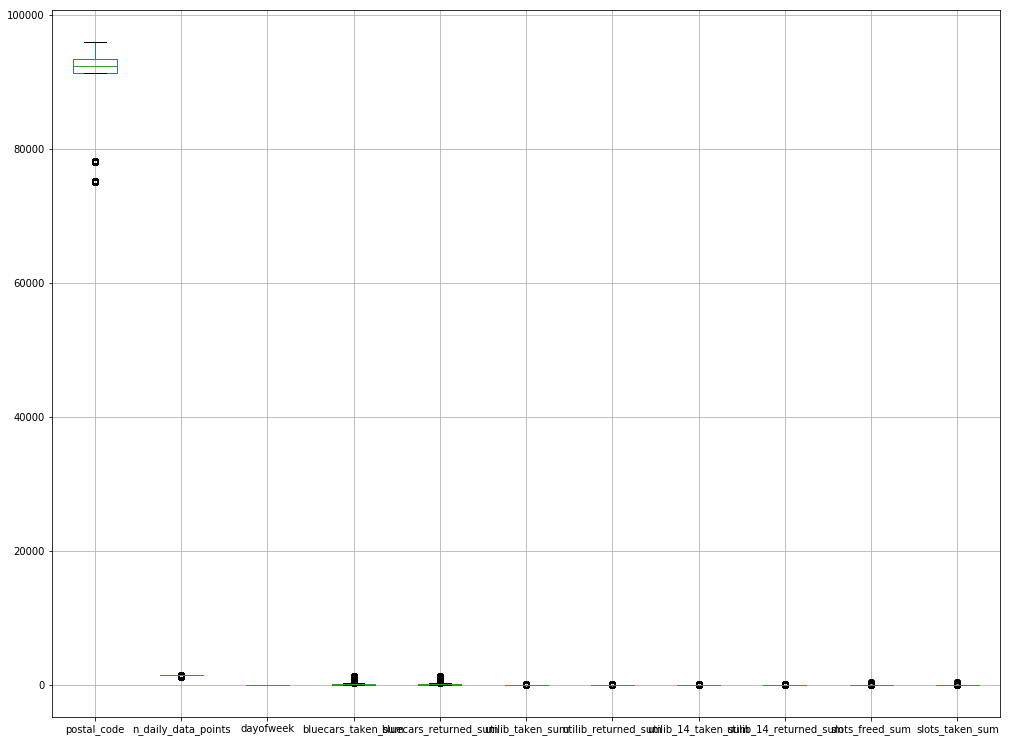

In [33]:
#checking the dataset for any outliers
#plots all the outliers for all numeric values columns
auto.boxplot(figsize = (17,13))

#most of the columns seem to have outliers but i shall keep them as they may be crucial to the model

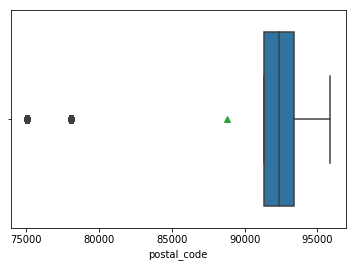

In [36]:
#boxplot for the postal code column
sns.boxplot(auto['postal_code'], showmeans = True)

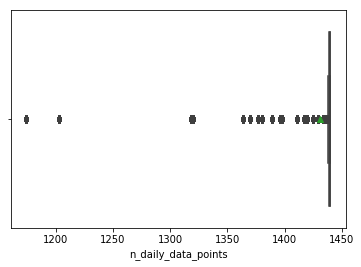

In [40]:
#boxplot for the daily data points column
sns.boxplot(auto['n_daily_data_points'], showmeans = True)
#the data points column seems to have many outliers but i shall keep them for my model

In [42]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

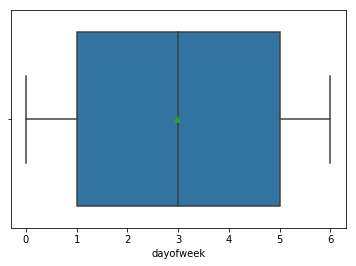

In [43]:
sns.boxplot(auto['dayofweek'], showmeans = True)
#the dayofweek column does not present any outliers

In [38]:
#checking the data set for any null values
auto.isnull().sum()
#the data set does not contain any null values

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [39]:
#iterating through all columns for unique values in the dataset
for i in auto.columns:
  #to print a line in between the columns
  print('\n')
  print(auto[i].unique())



[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '1/31

# Univariate Analysis

In [48]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [55]:
#iterating through all columns for unique values in the dataset
for x in auto.columns:
  #to print a line in between the columns
  print('\n')
  print(st.mean(auto))

TypeError: ignored

In [0]:
#measures of central tendency for the different variables in the data
#means of various variables
st.mean(auto[('n_daily_data_points','dayofweek')])

In [0]:
#Frequency table of the dataset using cross tab between country and has a bank account column
#financeone.value_counts()
frequencies = pd.crosstab(index=financeone["country"], columns=[financeone["has_a_bank_account"]],margins = True)
frequencies